# Forest Fire Data

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
from google.colab import files
uploaded = files.upload()

Saving forestfires.csv to forestfires.csv


In [3]:
forestfires = pd.read_csv('forestfires.csv')
forestfires.sample(5)

month  day  FFMC    DMC     DC  ISI  temp  RH  wind  rain  ...  monthfeb  \
134   mar  tue  88.1   25.7   67.6  3.8  14.9  38   2.7   0.0  ...         0   
95    sep  sun  89.7   90.0  704.4  4.8  17.8  64   1.3   0.0  ...         0   
516   nov  tue  79.5    3.0  106.7  1.1  11.8  31   4.5   0.0  ...         0   
157   aug  wed  92.1  111.2  654.1  9.6  18.4  45   3.6   0.0  ...         0   
426   aug  thu  91.6  248.4  753.8  6.3  20.4  56   2.2   0.0  ...         0   

     monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
134         0         0         0         1         0         0         0   
95          0         0         0         0         0         0         0   
516         0         0         0         0         0         1         0   
157         0         0         0         0         0         0         0   
426         0         0         0         0         0         0         0   

     monthsep  size_category  
134         0          small  
95          1          small  
516         0          small  
157         0          small  
426         0          small  

[5 rows x 31 columns]

In [4]:
forestfires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
forestfires[['area', 'size_category']].sample(20)

area size_category
163   1.95         small
41    0.00         small
330   6.58         large
185   7.04         large
9     0.00         small
317   3.78         small
179   5.23         small
68    0.00         small
149   1.12         small
98    0.00         small
160   1.75         small
496   2.77         small
71    0.00         small
446   0.00         small
309   0.00         small
389   0.00         small
102   0.00         small
277  10.73         large
381  16.33         large
16    0.00         small

In [6]:
forestfires = forestfires.drop(['month', 'day', 'area'], axis=1)
forestfires.sample(5)

FFMC    DMC     DC   ISI  temp  RH  wind  rain  dayfri  daymon  ...  \
506  91.0  166.9  752.6   7.1  18.5  73   8.5   0.0       1       0  ...   
323  90.7  136.9  822.8   6.8  12.9  39   2.7   0.0       0       0  ...   
85   92.9  137.0  706.4   9.2  21.5  15   0.9   0.0       0       0  ...   
327  92.2  102.3  751.5   8.4  21.2  32   2.2   0.0       0       0  ...   
272  92.1  152.6  658.2  14.3  20.2  47   4.0   0.0       0       0  ...   

     monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  \
506         0         0         0         0         0         0         0   
323         0         0         0         0         0         0         0   
85          0         0         0         0         0         0         0   
327         0         0         0         0         0         0         0   
272         0         0         0         0         0         0         0   

     monthoct  monthsep  size_category  
506         0         0          small  
323         0         1          small  
85          0         1          small  
327         0         1          small  
272         0         0          small  

[5 rows x 28 columns]

In [ ]:
# visualization
import seaborn as sns
sns.pairplot(forestfires)

In [ ]:
sns.heatmap(forestfires.corr(), annot = True)

In [ ]:
sns.distplot(forestfires['size_category'])

In [ ]:
sns.barplot(forestfires['size_category'], forestfires['temp'])

In [ ]:
sns.boxplot(forestfires['size_category'], forestfires['temp'])

In [ ]:
sns.jointplot(forestfires['size_category'], forestfires['temp'])

In [ ]:
sns.catplot(forestfires['size_category'], forestfires['temp'])

In [ ]:
sns.countplot(forestfires['size_category'])

In [ ]:
sns.countplot(forestfires['day'])

In [ ]:
sns.dogplot(forestfires['temp'])

In [7]:
X = forestfires.iloc[:, :-1]
y = forestfires.iloc[:, -1]

In [8]:
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((361, 27), (156, 27), (361,), (156,))

In [10]:
# GridSearch CV
clf = SVC()
param_grid = [{'kernel': ['linear','rbf'], 'gamma': [0.5,0.1,0.01], 'C': [10,0.1,0.01,0.001]}]
gsv = GridSearchCV(clf, param_grid, cv = 10, verbose = 3)
gsv.fit(X_train, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV 1/10] END ...C=10, gamma=0.5, kernel=linear;, score=0.757 total time=  41.3s
[CV 2/10] END ...C=10, gamma=0.5, kernel=linear;, score=0.722 total time=  27.8s
[CV 3/10] END ...C=10, gamma=0.5, kernel=linear;, score=0.750 total time=  17.2s
[CV 4/10] END ...C=10, gamma=0.5, kernel=linear;, score=0.694 total time=  21.7s
[CV 5/10] END ...C=10, gamma=0.5, kernel=linear;, score=0.722 total time=  28.3s
[CV 6/10] END ...C=10, gamma=0.5, kernel=linear;, score=0.722 total time=  12.7s
[CV 7/10] END ...C=10, gamma=0.5, kernel=linear;, score=0.750 total time=  19.7s
[CV 8/10] END ...C=10, gamma=0.5, kernel=linear;, score=0.722 total time=  33.9s
[CV 9/10] END ...C=10, gamma=0.5, kernel=linear;, score=0.722 total time=  12.9s
[CV 10/10] END ..C=10, gamma=0.5, kernel=linear;, score=0.806 total time=  36.1s
[CV 1/10] END ......C=10, gamma=0.5, kernel=rbf;, score=0.703 total time=   0.0s
[CV 2/10] END ......C=10, gamma=0.5, kernel=rb

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [10, 0.1, 0.01, 0.001],
                          'gamma': [0.5, 0.1, 0.01],
                          'kernel': ['linear', 'rbf']}],
             verbose=3)

In [ ]:
# GridSearch CV
clf = SVC()
param_grid = [{'kernel': ['poly','rbf'], 'gamma': [50,5,10,0.5], 'C':[15,14,13,12,11,10,0.1,0.001]}]
gsv = GridSearchCV(clf, param_grid, cv = 10)
gsv.fit(X_train, y_train)

In [ ]:
gsv.best_params_, gsv.best_score_

In [ ]:
clf = SVC(kernel = 'linear', C = 10, gamma = 0.5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)*100
print('Accuracy = ', acc)
confusion_matrix(y_test, y_pred)
y_pred

# Salary Data

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
from google.colab import files
uploaded = files.upload()

Saving SalaryData_Train(1).csv to SalaryData_Train(1).csv


In [3]:
Train = pd.read_csv('SalaryData_Train(1).csv')
Train.head()

age          workclass   education  educationno        maritalstatus  \
0   39          State-gov   Bachelors           13        Never-married   
1   50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2   38            Private     HS-grad            9             Divorced   
3   53            Private        11th            7   Married-civ-spouse   
4   28            Private   Bachelors           13   Married-civ-spouse   

           occupation    relationship    race      sex  capitalgain  \
0        Adm-clerical   Not-in-family   White     Male         2174   
1     Exec-managerial         Husband   White     Male            0   
2   Handlers-cleaners   Not-in-family   White     Male            0   
3   Handlers-cleaners         Husband   Black     Male            0   
4      Prof-specialty            Wife   Black   Female            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1            0            13   United-States   <=50K  
2            0            40   United-States   <=50K  
3            0            40   United-States   <=50K  
4            0            40            Cuba   <=50K

In [4]:
from google.colab import files
uploaded = files.upload()

Saving SalaryData_Test(1).csv to SalaryData_Test(1).csv


In [5]:
Test = pd.read_csv('SalaryData_Test(1).csv')
Test.head()

age   workclass      education  educationno        maritalstatus  \
0   25     Private           11th            7        Never-married   
1   38     Private        HS-grad            9   Married-civ-spouse   
2   28   Local-gov     Assoc-acdm           12   Married-civ-spouse   
3   44     Private   Some-college           10   Married-civ-spouse   
4   34     Private           10th            6        Never-married   

           occupation    relationship    race    sex  capitalgain  \
0   Machine-op-inspct       Own-child   Black   Male            0   
1     Farming-fishing         Husband   White   Male            0   
2     Protective-serv         Husband   White   Male            0   
3   Machine-op-inspct         Husband   Black   Male         7688   
4       Other-service   Not-in-family   White   Male            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1            0            50   United-States   <=50K  
2            0            40   United-States    >50K  
3            0            40   United-States    >50K  
4            0            30   United-States   <=50K

In [6]:
# Train Data preprocessing using LabelEncoder
Train['workclass'] = LabelEncoder().fit_transform(Train['workclass'])
Train['education'] = LabelEncoder().fit_transform(Train['education'])
Train['maritalstatus'] = LabelEncoder().fit_transform(Train['maritalstatus'])
Train['occupation'] = LabelEncoder().fit_transform(Train['occupation'])
Train['relationship'] = LabelEncoder().fit_transform(Train['relationship'])
Train['race'] = LabelEncoder().fit_transform(Train['race'])
Train['sex'] = LabelEncoder().fit_transform(Train['sex'])
Train['native'] = LabelEncoder().fit_transform(Train['native'])
Train['Salary'] = LabelEncoder().fit_transform(Train['Salary'])

In [7]:
# Test Data preprocessing using LabelEncoder
Test['workclass'] = LabelEncoder().fit_transform(Test['workclass'])
Test['education'] = LabelEncoder().fit_transform(Test['education'])
Test['maritalstatus'] = LabelEncoder().fit_transform(Test['maritalstatus'])
Test['occupation'] = LabelEncoder().fit_transform(Test['occupation'])
Test['relationship'] = LabelEncoder().fit_transform(Test['relationship'])
Test['race'] = LabelEncoder().fit_transform(Test['race'])
Test['sex'] = LabelEncoder().fit_transform(Test['sex'])
Test['native'] = LabelEncoder().fit_transform(Test['native'])
Test['Salary'] = LabelEncoder().fit_transform(Test['Salary'])

In [8]:
Train.head()

age  workclass  education  educationno  maritalstatus  occupation  \
0   39          5          9           13              4           0   
1   50          4          9           13              2           3   
2   38          2         11            9              0           5   
3   53          2          1            7              2           5   
4   28          2          9           13              2           9   

   relationship  race  sex  capitalgain  capitalloss  hoursperweek  native  \
0             1     4    1         2174            0            40      37   
1             0     4    1            0            0            13      37   
2             1     4    1            0            0            40      37   
3             0     2    1            0            0            40      37   
4             5     2    0            0            0            40       4   

   Salary  
0       0  
1       0  
2       0  
3       0  
4       0

In [9]:
Test.head()

age  workclass  education  educationno  maritalstatus  occupation  \
0   25          2          1            7              4           6   
1   38          2         11            9              2           4   
2   28          1          7           12              2          10   
3   44          2         15           10              2           6   
4   34          2          0            6              4           7   

   relationship  race  sex  capitalgain  capitalloss  hoursperweek  native  \
0             3     2    1            0            0            40      37   
1             0     4    1            0            0            50      37   
2             0     4    1            0            0            40      37   
3             0     2    1         7688            0            40      37   
4             1     4    1            0            0            30      37   

   Salary  
0       0  
1       0  
2       1  
3       1  
4       0

In [10]:
Train.shape, Test.shape

((30161, 14), (15060, 14))

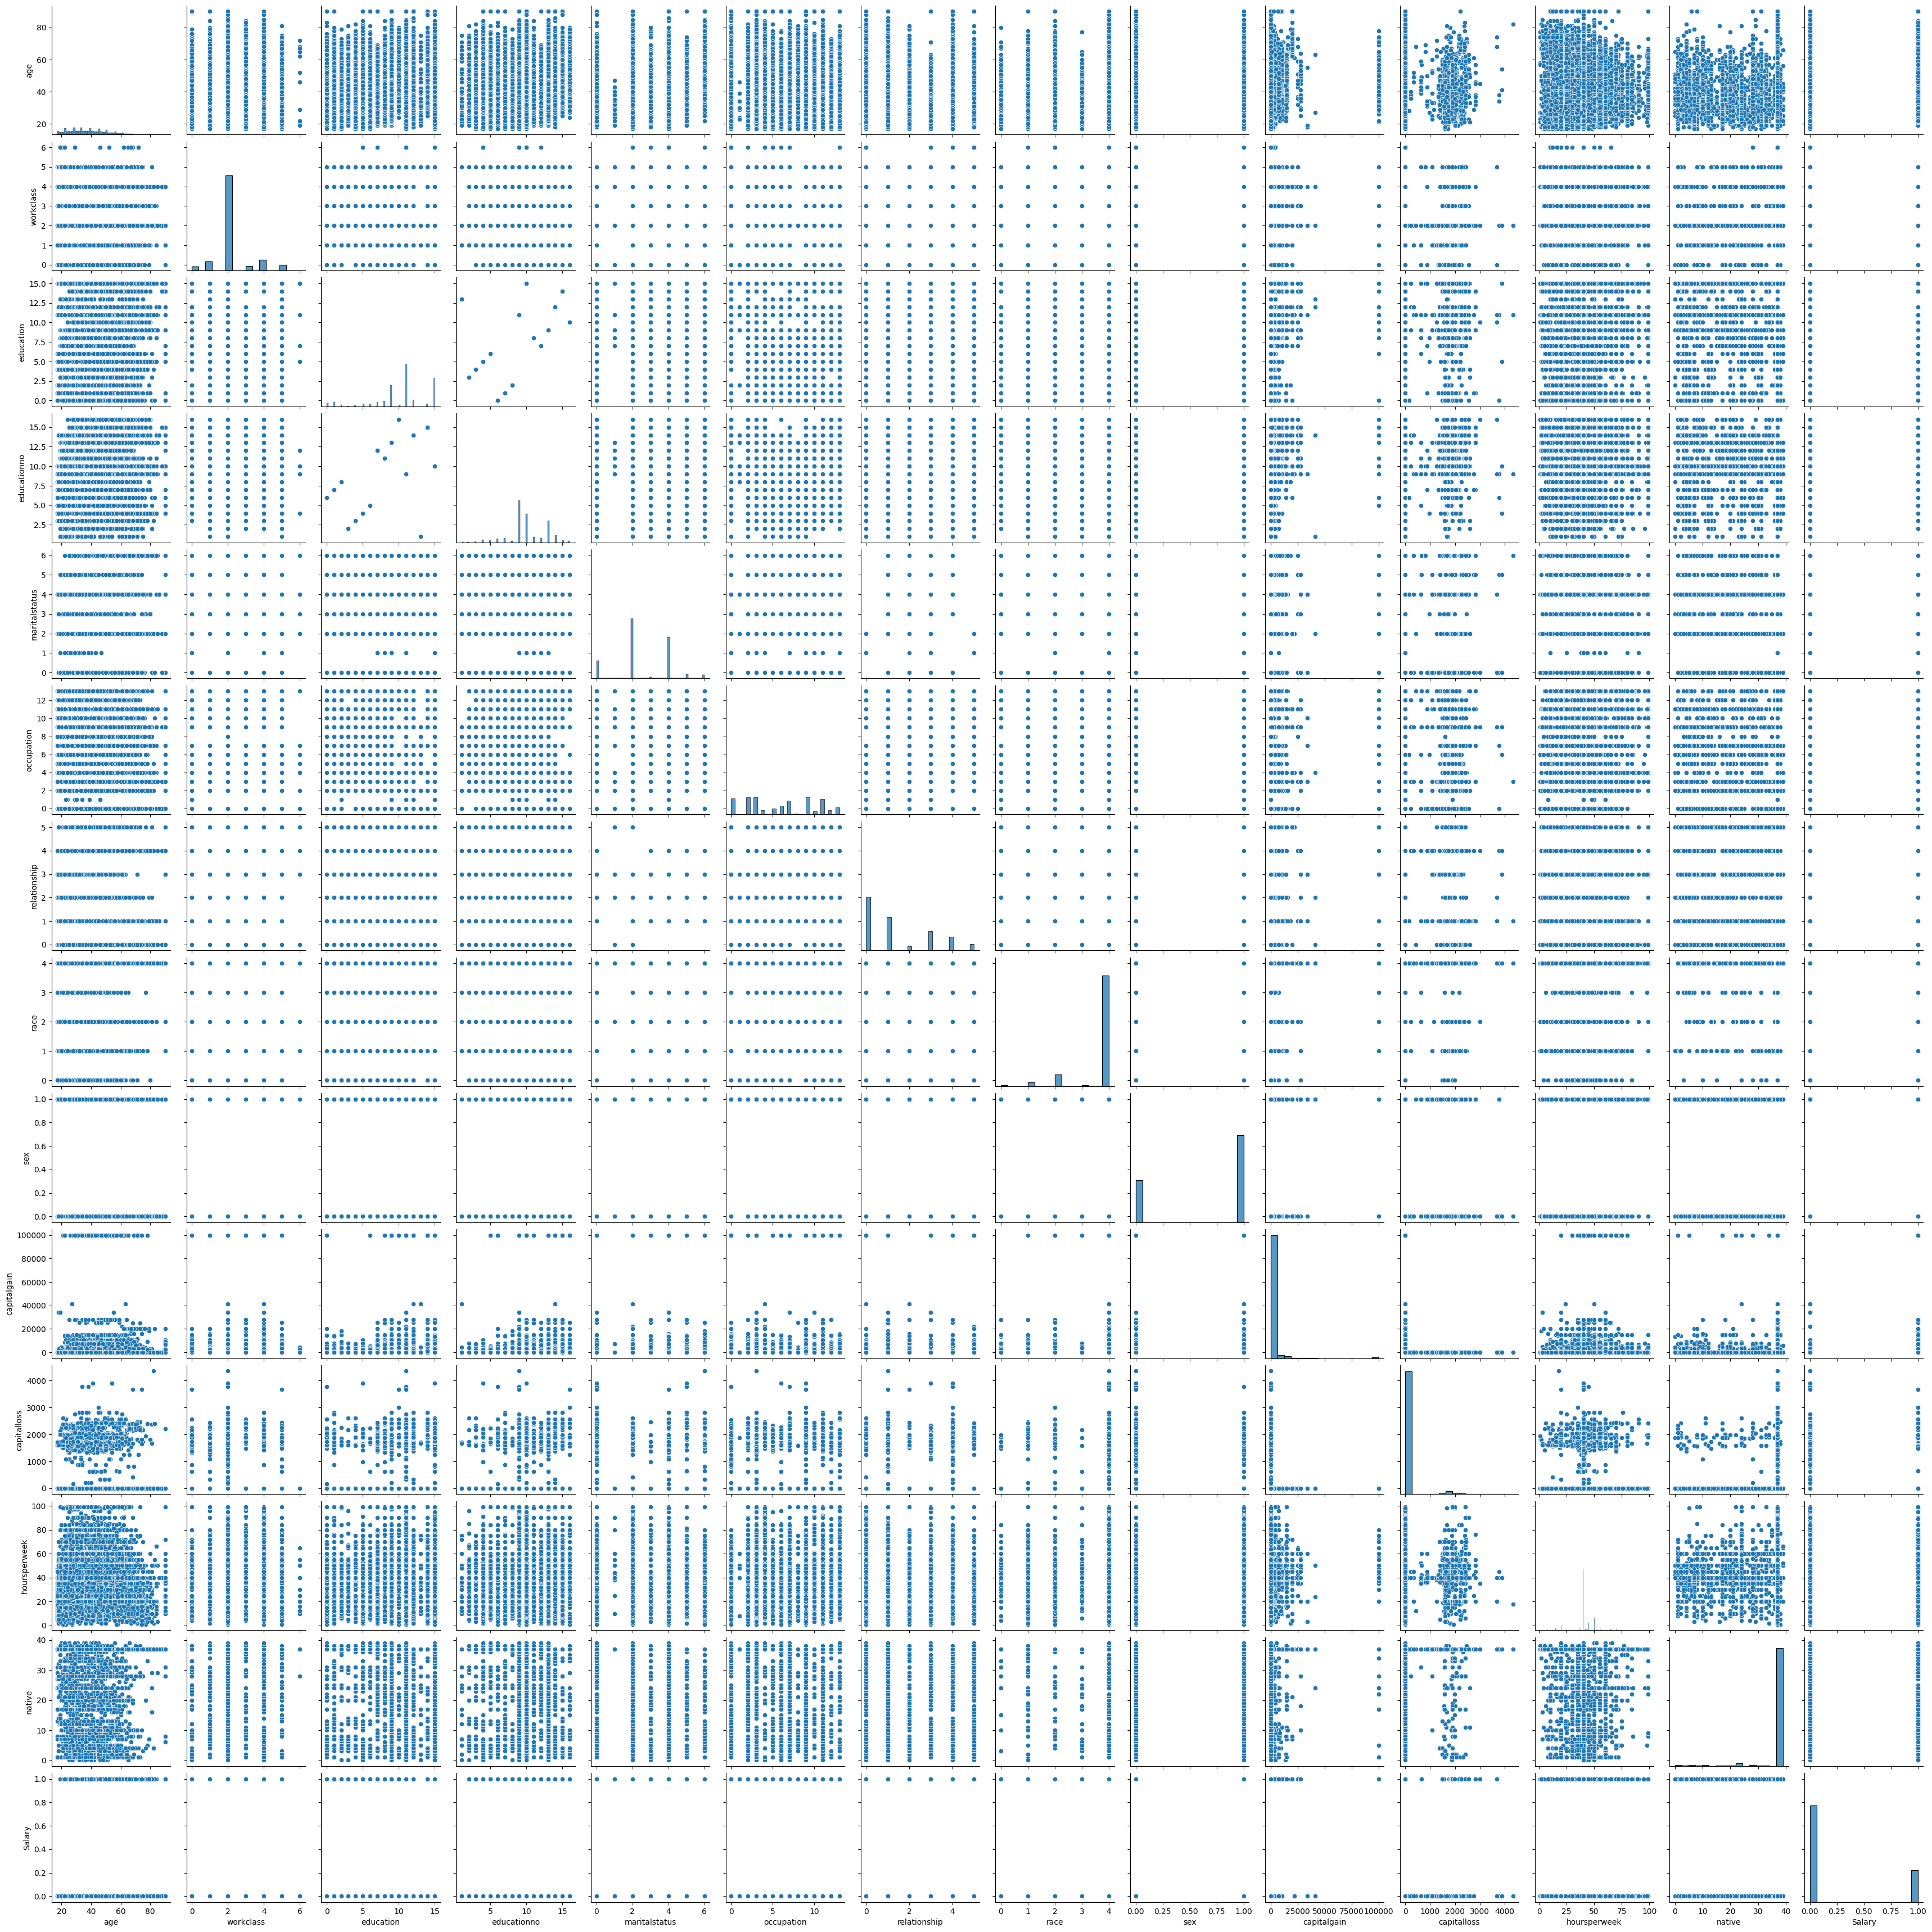

In [11]:
# visualization
import seaborn as sns
sns.pairplot(Train)

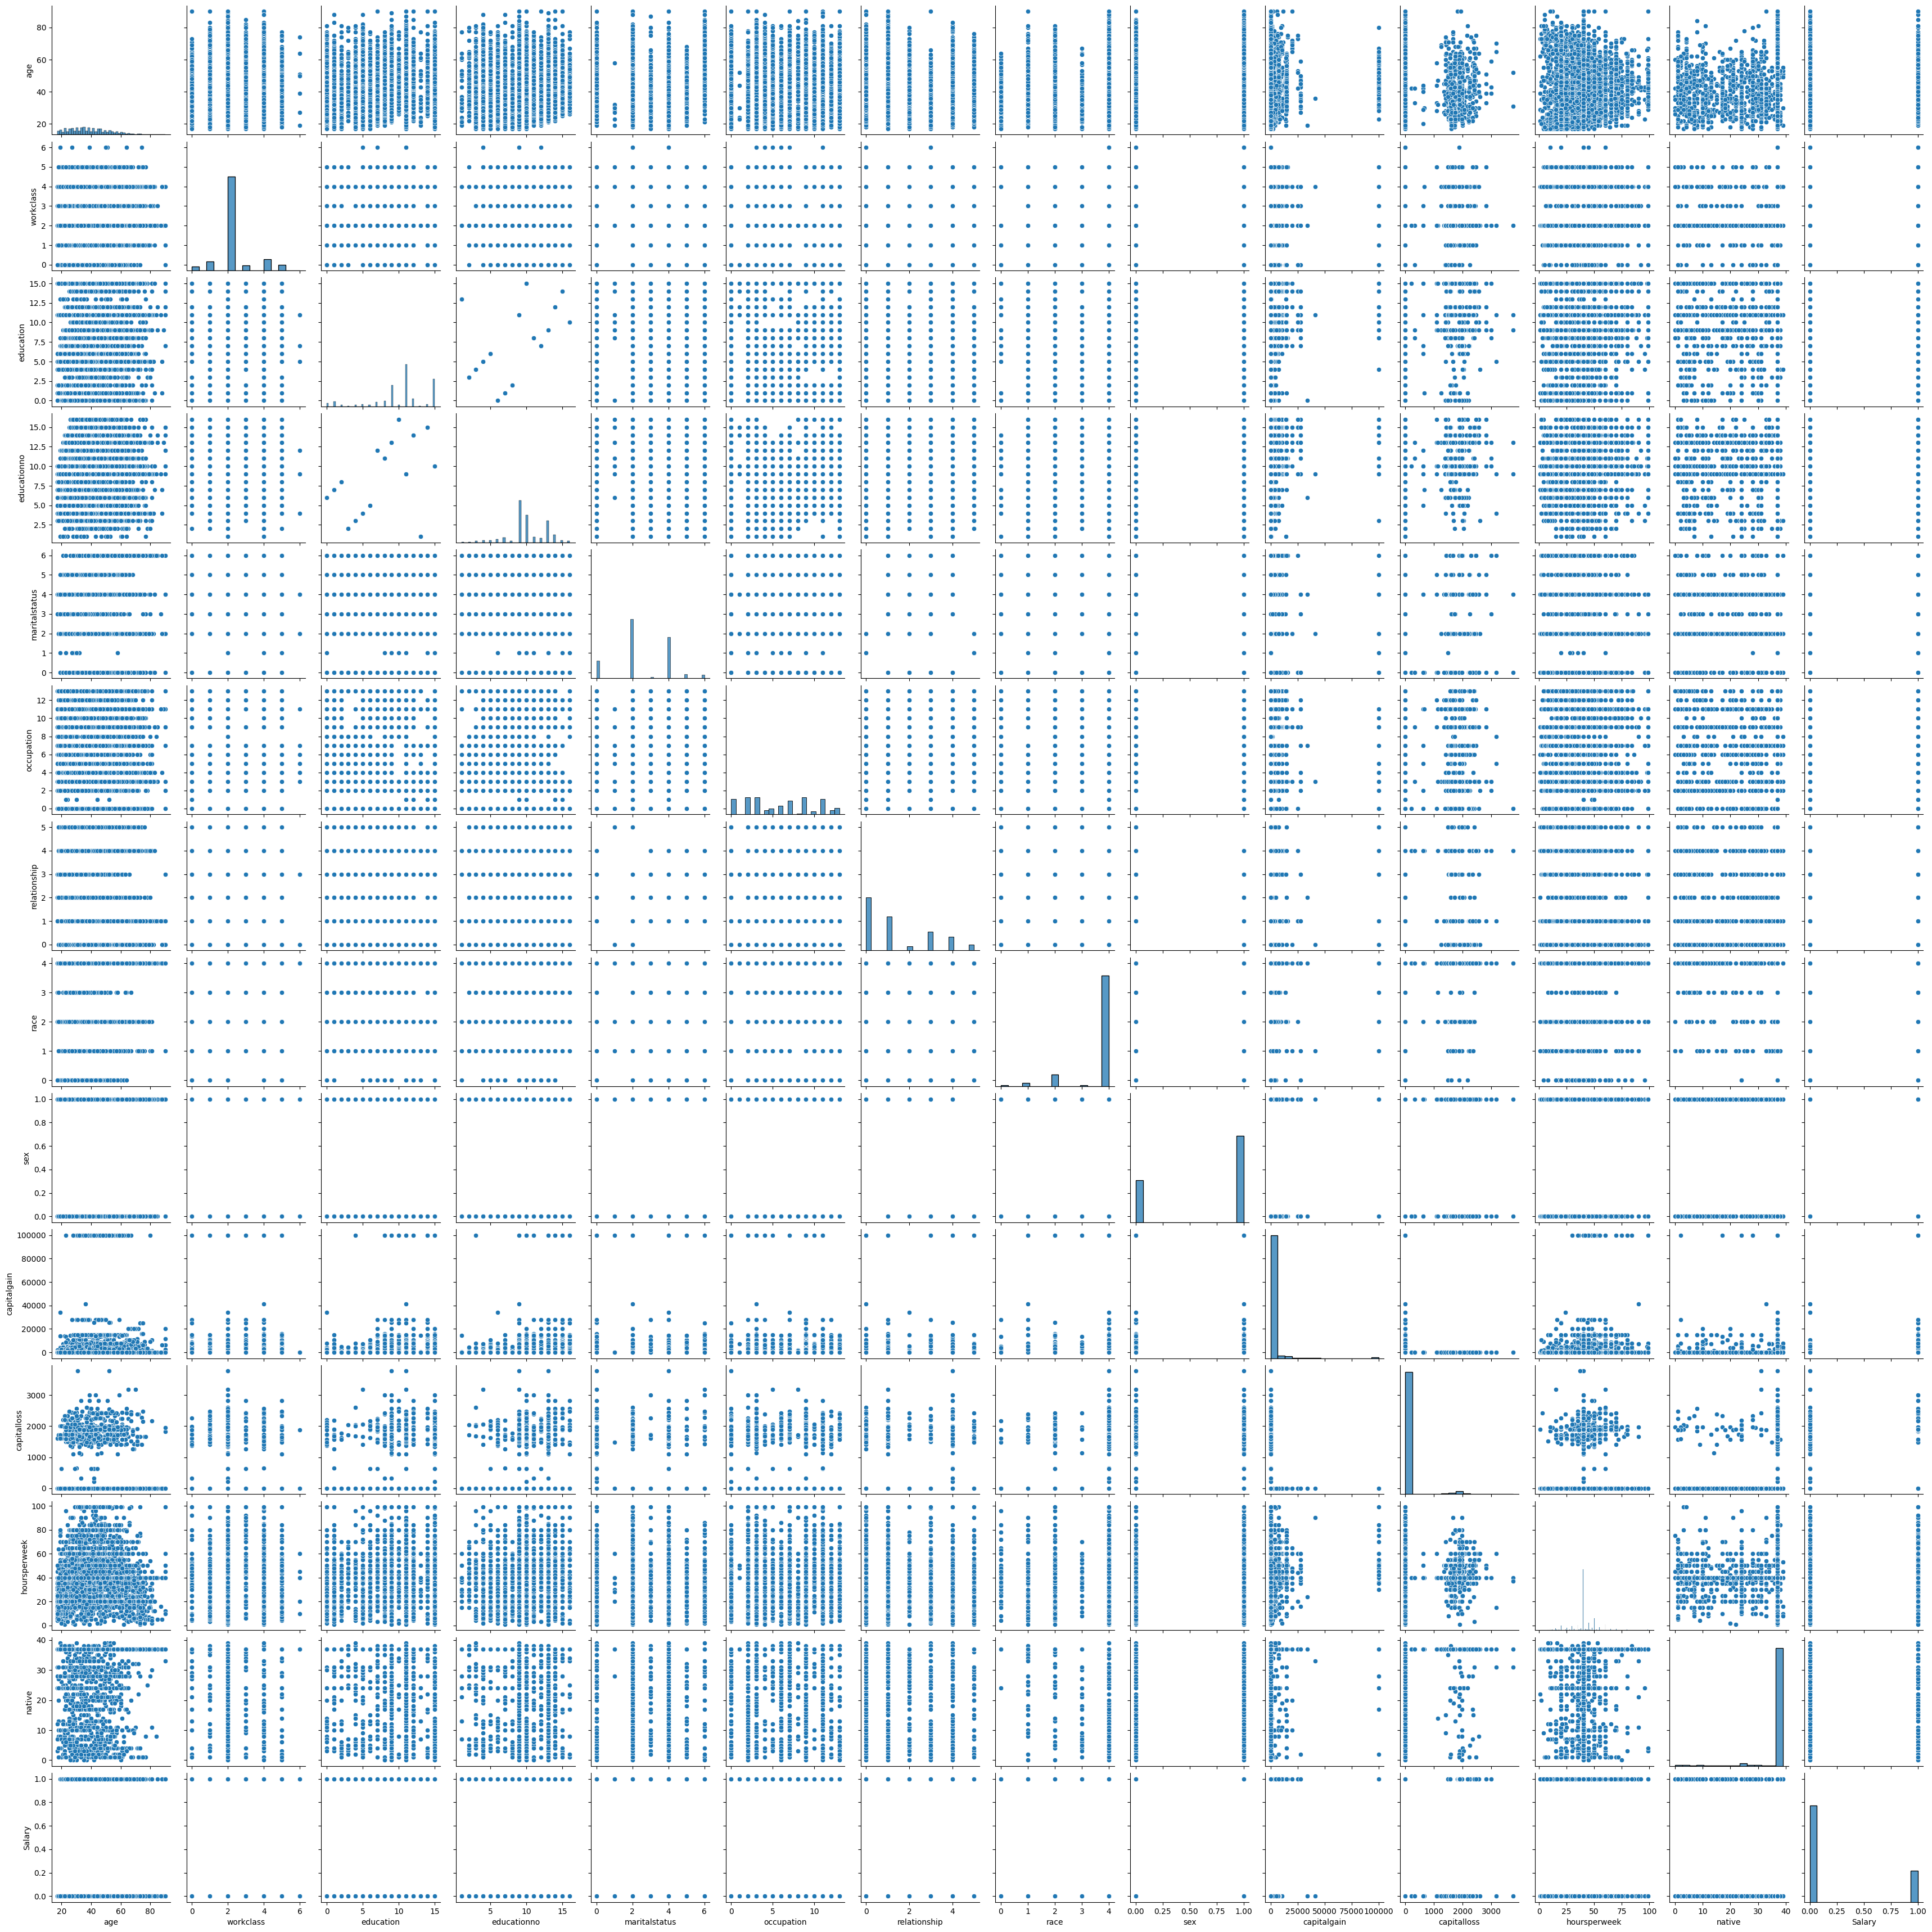

In [12]:
sns.pairplot(Test)

<Axes: >

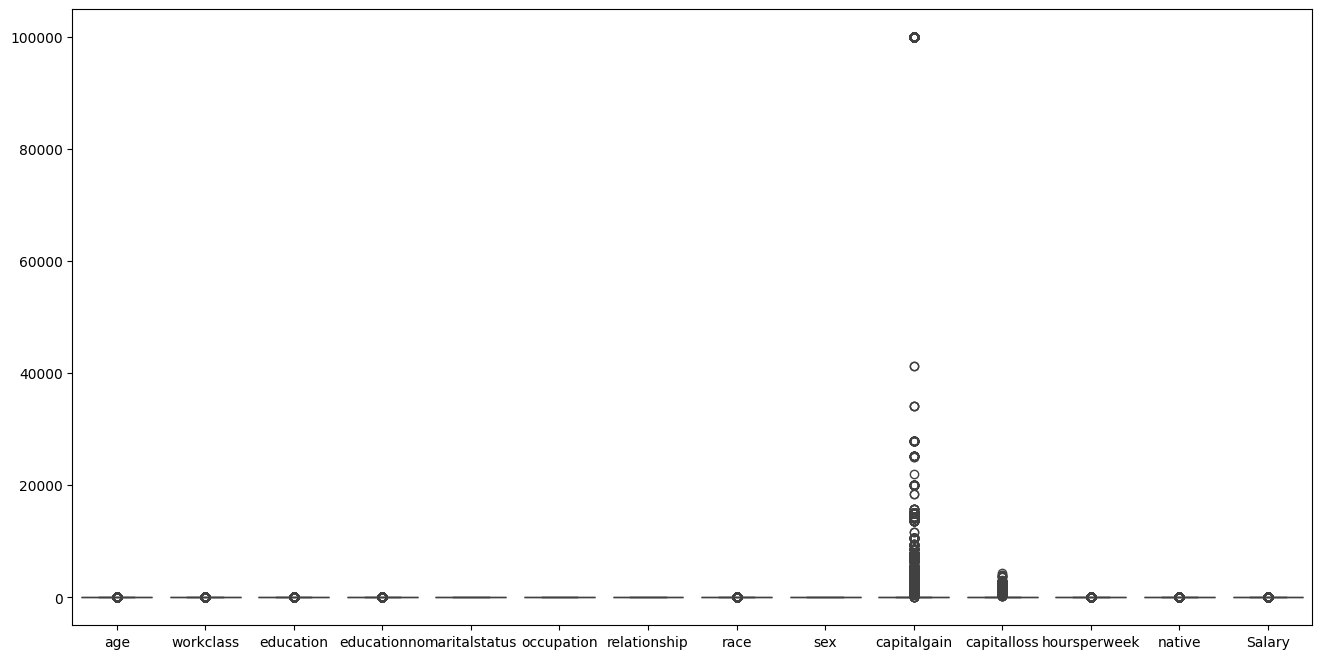

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16, 8))
sns.boxplot(Train)

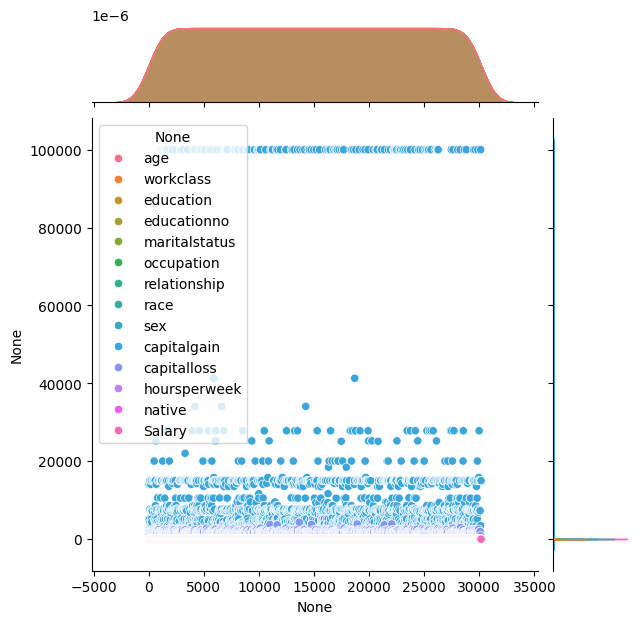

In [20]:
sns.jointplot(Train)

<Axes: >

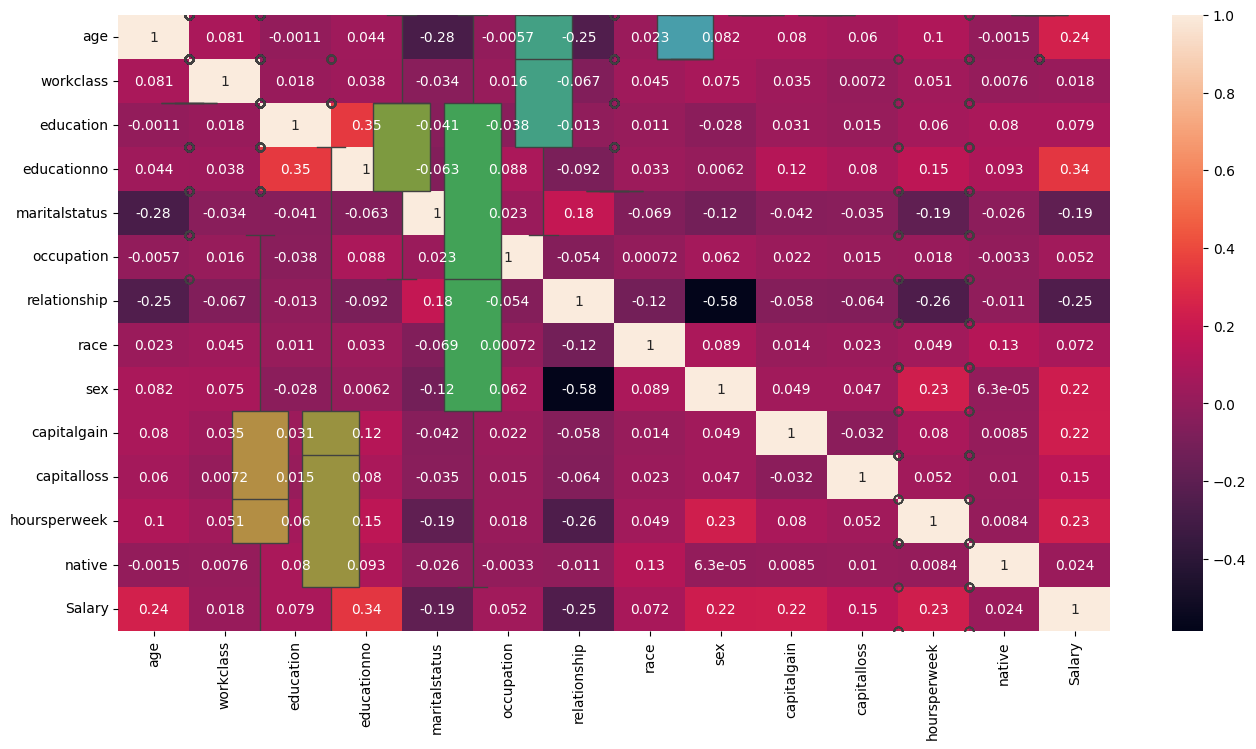

In [27]:
plt.figure(figsize = (16, 8))
sns.boxplot(Test)
sns.heatmap(Train.corr(), annot = True)

<Axes: >

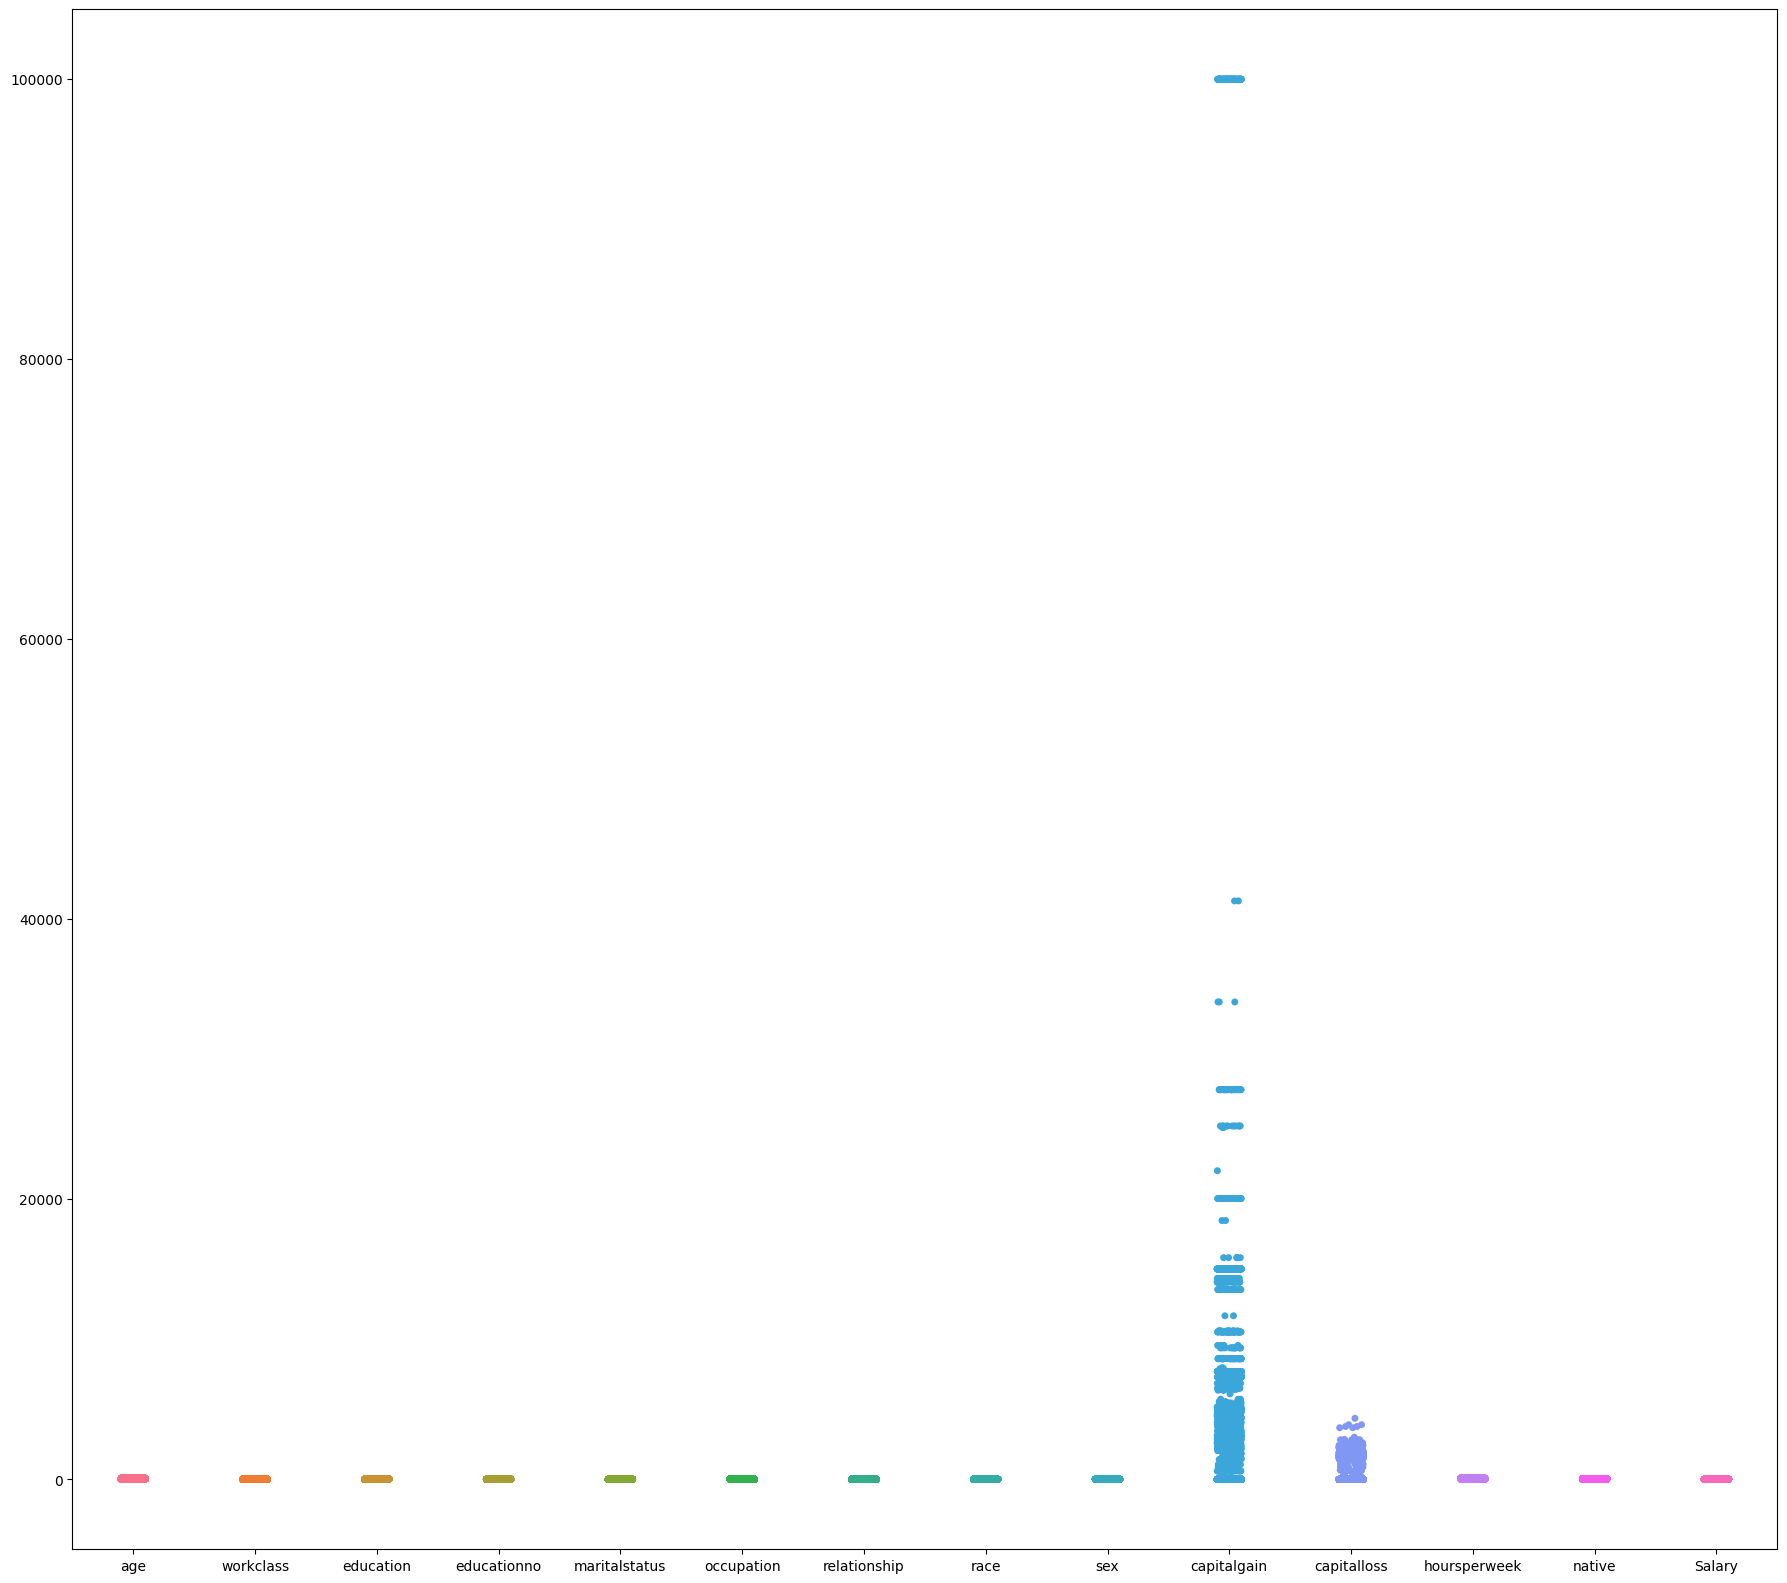

In [29]:
plt.figure(figsize = (22, 20))
sns.stripplot(Train)

<Axes: xlabel='Salary', ylabel='Density'>

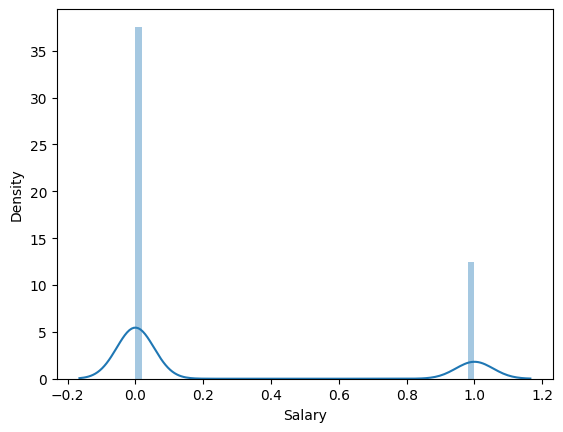

In [30]:
sns.distplot(Train['Salary'])

In [ ]:
X_train = Train.iloc[:, :-1]
y_train = Train.iloc[:, -1]
X_test = Test.iloc[:, :-1]
y_test = Test.iloc[:, -1]

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((30161, 13), (15060, 13), (30161,), (15060,))

In [ ]:
# GridSearchCV
clf = SVC()
param_grid = [{'kernel': ['rbf'], 'gamma': [5, 10, 0.5], 'C': [15, 0.1, 0.01]}]
gsv = GridSearchCV(clf, param_grid, cv = 3, verbose = 3)
gsv.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END .........C=15, gamma=5, kernel=rbf;, score=0.757 total time= 1.9min
[CV 2/3] END .........C=15, gamma=5, kernel=rbf;, score=0.755 total time= 2.0min
[CV 3/3] END .........C=15, gamma=5, kernel=rbf;, score=0.755 total time= 2.0min
[CV 1/3] END ........C=15, gamma=10, kernel=rbf;, score=0.757 total time= 1.9min
[CV 2/3] END ........C=15, gamma=10, kernel=rbf;, score=0.755 total time= 1.8min
[CV 3/3] END ........C=15, gamma=10, kernel=rbf;, score=0.755 total time= 1.8min
[CV 1/3] END .......C=15, gamma=0.5, kernel=rbf;, score=0.766 total time= 1.8min
[CV 2/3] END .......C=15, gamma=0.5, kernel=rbf;, score=0.760 total time= 1.8min
[CV 3/3] END .......C=15, gamma=0.5, kernel=rbf;, score=0.761 total time= 1.8min
[CV 1/3] END ........C=0.1, gamma=5, kernel=rbf;, score=0.751 total time= 1.4min
[CV 2/3] END ........C=0.1, gamma=5, kernel=rbf;, score=0.751 total time= 1.5min
[CV 3/3] END ........C=0.1, gamma=5, kernel=rbf;,

GridSearchCV(cv=3, estimator=SVC(),
             param_grid=[{'C': [15, 0.1, 0.01], 'gamma': [5, 10, 0.5],
                          'kernel': ['rbf']}],
             verbose=3)

In [ ]:
gsv.best_params_, gsv.best_score_

({'C': 15, 'gamma': 0.5, 'kernel': 'rbf'}, 0.7623751995202563)

In [ ]:
clf = SVC(kernel = 'rbf', C = 15, gamma = 0.5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)*100
print('Accuracy = ', acc)
confusion_matrix(y_test, y_pred)
y_pred

Accuracy =  77.19123505976096


array([0, 0, 0, ..., 1, 0, 0])